<a href="https://colab.research.google.com/github/PriyankaMittapelly/SaiPriyanka_INFO5731_-Fall2020/blob/main/ML_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and prepare the data

In [3]:
#importing the data
import pandas as pd
import numpy as np

df = pd.read_csv("/content/ALS_TrainingData_2223.csv")

df

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


In [51]:
#To check whether any null values are present
del df['ID']
df.isnull().sum()

Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
Albumin_range      0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 100, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


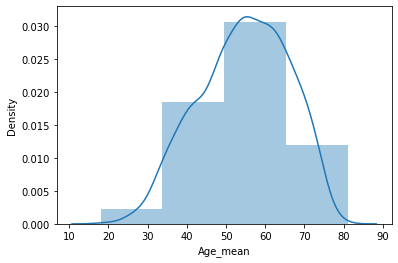

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(df['Age_mean' ], bins = 4)
plt.show()

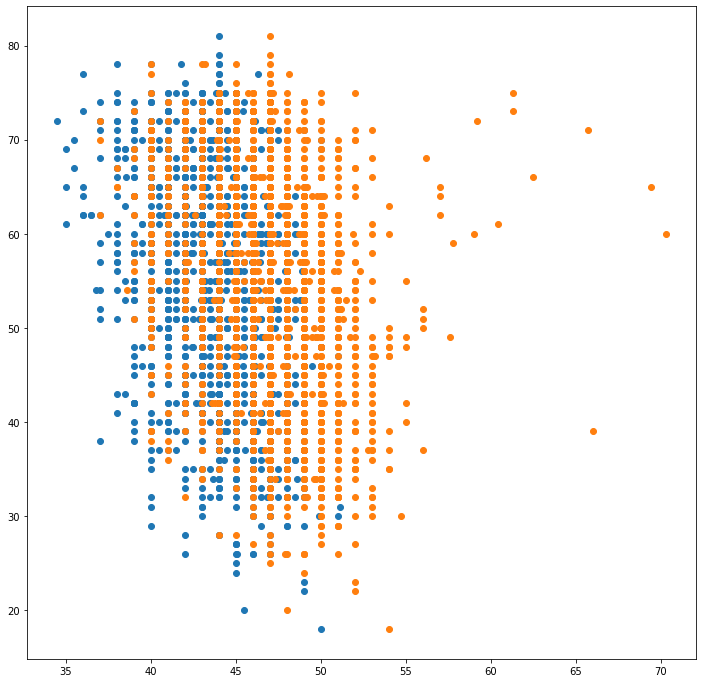

In [55]:
import matplotlib.pyplot as plt

#sns.heatmap(df.corr(), annot=True, fmt='.2f')

plt.figure(figsize=(12,12))

plt.scatter(df['Albumin_median'], df['Age_mean'], label='Albumin_median')

plt.scatter(df['Albumin_max'], df['Age_mean'], label='Albumin_max')


In [56]:
data = df.iloc[:,:].values

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)

kmeans.fit(data)
y = kmeans.predict(data)


In [57]:
#SSE VALUE FOR K=2

kmeans.inertia_

46007038157312.64

AS THE SSE VALUE IS HIGH , SO THERE COULD BE POSSIBILITY THE CHOOSEN K VALUE IS NOT A GOOD CHOICE . INCREASING NUMBER OF CLUSTERS WILL DECREASE SSE VALUE , SO OTHER K VALUE GREATER THAN 3 

In [109]:
# THE K VALUE IS 3

from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters = 3)

kmeans2.fit(data)
y_data2 = kmeans.predict(data)

y2=np.round(kmeans2.cluster_centers_)


In [110]:
y_data2

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [111]:
# SSE VALUE FOR K VALUE 3 

kmeans2.inertia_

20529496285660.28

In [112]:
kmeans2.cluster_centers_

array([[ 5.47890724e+01,  4.69124396e+01,  4.38717916e+01,
         4.07104320e+01,  1.37014460e-02, -7.09803155e-01,
         3.16594663e+01,  2.70108005e+01,  2.01410419e+01,
         2.56642446e-02,  5.41257942e+01,  3.24161372e+01,
         2.28989835e+01,  7.34293234e-02,  4.26670902e+01,
         2.88532402e+01,  2.15437103e+01,  4.96307373e-02,
         3.08282084e+01,  2.70202033e+01,  2.31820839e+01,
         1.69518016e-02,  7.39966779e+00,  5.58637940e+00,
         4.16490154e+00,  7.40849041e-03,  9.17700127e+01,
         8.09701398e+01,  6.96099111e+01,  4.81038876e-02,
         1.47132147e+02,  1.29627700e+02,  1.13388818e+02,
         7.20550422e-02,  2.47221489e+00,  2.34962092e+00,
         2.22204602e+00,  5.49610015e-04,  1.07108386e+02,
         1.03454384e+02,  9.93410419e+01,  1.76753520e-02,
         7.87214943e+01,  6.53538043e+01,  5.25896925e+01,
         5.74631832e-02,  1.64167726e+00,  7.12051842e+00,
         5.49502287e+00,  4.28227467e+00,  6.21330993e-0

In [113]:
kmeans2.cluster_centers_[:,1]

array([46.91243964, 47.06345404, 47.06699164])

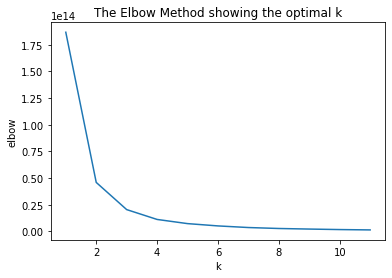

In [106]:
#ELBOW METHOD TO CROSS CHECK THE WHICJ K VALUE IS BETTER CHOICE
elbow = []
i = range(1,12)
for k in i:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    elbow.append(kmeanModel.inertia_)
#plotting the elbow method 
plt.figure(figsize=(6,4))
plt.plot(i, elbow)
plt.xlabel('k')
plt.ylabel('elbow')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [108]:
elbow

[186772074820737.88,
 46007038157312.64,
 20529496285660.28,
 11294780170858.203,
 7391349122133.959,
 5234067021600.694,
 3717435445029.7256,
 2818703736488.0605,
 2280507991585.2754,
 1812313337836.0479,
 1483380889129.3613]

In [65]:
# SILHOUETTE  TO CHECK K=4 IS K VALUE 

import sklearn.metrics as metrics

from sklearn.cluster import KMeans


for j in range(2,10):
    labels= KMeans(n_clusters=j, init='k-means++', random_state=100) .fit(data).labels_
    
    print("Silhouette score =  " +str(j)+ " is" 
    +str(metrics.silhouette_score(data,labels,metric ="euclidean" ,sample_size = 1000, random_state=100)))

Silhouette score =  2 is0.6314503456482371
Silhouette score =  3 is0.5889694489376943
Silhouette score =  4 is0.5792246086133876
Silhouette score =  5 is0.5655607568905272
Silhouette score =  6 is0.5496121944555699
Silhouette score =  7 is0.5420047900629964
Silhouette score =  8 is0.5533407689001649
Silhouette score =  9 is0.553523823528519


In [68]:
#importing the TESTING data
import pandas as pd
import numpy as np

df2 = pd.read_csv("/content/ALS_TestingData_78.csv")

df2

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,...,5,0.004329,6.0,5.50,5.0,0.002165,12.45,8.370,5.56,0.014913
74,97,47.709589,47.0,44.0,41,0.005381,-0.324733,26,19.0,11,...,0,0.005381,7.5,6.00,5.5,0.001845,13.92,10.265,8.37,0.004978
75,98,59.928767,47.0,44.0,40,0.009333,-0.330616,33,24.0,10,...,1,0.008000,7.5,6.50,6.0,0.002000,16.69,5.445,4.48,0.016280
76,99,61.000000,42.0,39.0,38,0.007843,-0.439230,37,33.0,31,...,4,0.005882,6.5,6.00,5.5,0.001961,10.66,7.390,5.81,0.009510


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 131 entries, ID to White.Blood.Cell..WBC._range
dtypes: float64(92), int64(39)
memory usage: 80.0 KB


In [70]:
df4 = pd.DataFrame()


In [72]:
print(list(df.columns))
df4=pd.DataFrame(df2,columns=['Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range', 'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range', 'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range', 'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max', 'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range', 'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min', 'bp_systolic_range', 'Calcium_max', 'Calcium_median', 'Calcium_min', 'Calcium_range', 'Chloride_max', 'Chloride_median', 'Chloride_min', 'Chloride_range', 'Creatinine_max', 'Creatinine_median', 'Creatinine_min', 'Creatinine_range', 'Gender_mean', 'Glucose_max', 'Glucose_median', 'Glucose_min', 'Glucose_range', 'hands_max', 'hands_median', 'hands_min', 'hands_range', 'Hematocrit_max', 'Hematocrit_median', 'Hematocrit_min', 'Hematocrit_range', 'Hemoglobin_max', 'Hemoglobin_median', 'Hemoglobin_min', 'Hemoglobin_range', 'leg_max', 'leg_median', 'leg_min', 'leg_range', 'mouth_max', 'mouth_median', 'mouth_min', 'mouth_range', 'onset_delta_mean', 'onset_site_mean', 'Platelets_max', 'Platelets_median', 'Platelets_min', 'Potassium_max', 'Potassium_median', 'Potassium_min', 'Potassium_range', 'pulse_max', 'pulse_median', 'pulse_min', 'pulse_range', 'respiratory_max', 'respiratory_median', 'respiratory_min', 'respiratory_range', 'Sodium_max', 'Sodium_median', 'Sodium_min', 'Sodium_range', 'SubjectID', 'trunk_max', 'trunk_median', 'trunk_min', 'trunk_range', 'Urine.Ph_max', 'Urine.Ph_median', 'Urine.Ph_min'])

['Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range', 'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range', 'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range', 'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max', 'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range', 'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min', 'bp_systolic_range', 'Calcium_max', 'Calcium_median', 'Calcium_min', 'Calcium_range', 'Chloride_max', 'Chloride_median', 'Chloride_min', 'Chloride_range', 'Creatinine_max', 'Creatinine_median', 'Creatinine_min', 'Creatinine_range', 'Gender_mean', 'Glucose_max', 'Glucose_median', 'Glucose_min', 'Glucose_range', 

In [73]:
df4

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,...,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0
1,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,...,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0
2,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,...,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0
3,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,...,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0
4,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,...,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,0.021645,...,136,0.019481,921629,7,7.0,5,0.004329,6.0,5.50,5.0
74,47.709589,47.0,44.0,41,0.005381,-0.324733,26,19.0,11,0.013453,...,137,0.003587,943781,6,1.0,0,0.005381,7.5,6.00,5.5
75,59.928767,47.0,44.0,40,0.009333,-0.330616,33,24.0,10,0.030667,...,136,0.012000,945153,7,4.0,1,0.008000,7.5,6.50,6.0
76,61.000000,42.0,39.0,38,0.007843,-0.439230,37,33.0,31,0.011765,...,138,0.009804,957124,7,5.0,4,0.005882,6.5,6.00,5.5


In [74]:
df4.info()

data2 = df4.iloc[:,:].values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 100 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          78 non-null     float64
 1   Albumin_max                       78 non-null     float64
 2   Albumin_median                    78 non-null     float64
 3   Albumin_min                       78 non-null     int64  
 4   Albumin_range                     78 non-null     float64
 5   ALSFRS_slope                      78 non-null     float64
 6   ALSFRS_Total_max                  78 non-null     int64  
 7   ALSFRS_Total_median               78 non-null     float64
 8   ALSFRS_Total_min                  78 non-null     int64  
 9   ALSFRS_Total_range                78 non-null     float64
 10  ALT.SGPT._max                     78 non-null     int64  
 11  ALT.SGPT._median                  78 non-null     float64
 12  ALT.SGPT.

In [114]:
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters = 4)

kmeans3.fit(data2)
y_data3 = kmeans3.predict(data2)

y3=np.round(kmeans3.cluster_centers_)

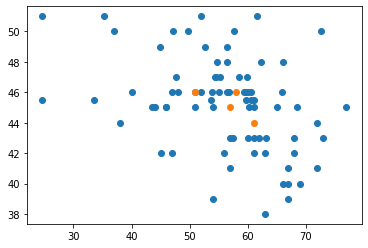

In [115]:
plt.scatter(data2[:,0],data2[:,1])
plt.scatter(y3[:,0],y3[:,1])

In [116]:
kmeans3.cluster_centers_[:,1]

array([44.21428571, 45.73809524, 45.88888889, 44.98      ])

In [117]:
kmeans3.inertia_

341039083772.15063

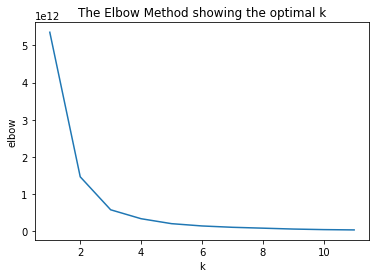

In [118]:
elbow = []
i = range(1,12)
for k in i:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df4)
    elbow.append(kmeanModel.inertia_)
#plotting the elbow method 
plt.figure(figsize=(6,4))
plt.plot(i, elbow)
plt.xlabel('k')
plt.ylabel('elbow')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [119]:
elbow

[5350520825998.014,
 1466881233440.2158,
 581021825861.3298,
 341039083772.15063,
 208335514944.2259,
 146636516284.92334,
 110714666952.36473,
 87180300278.85016,
 63431467113.40967,
 48374357990.809784,
 40233554537.43319]

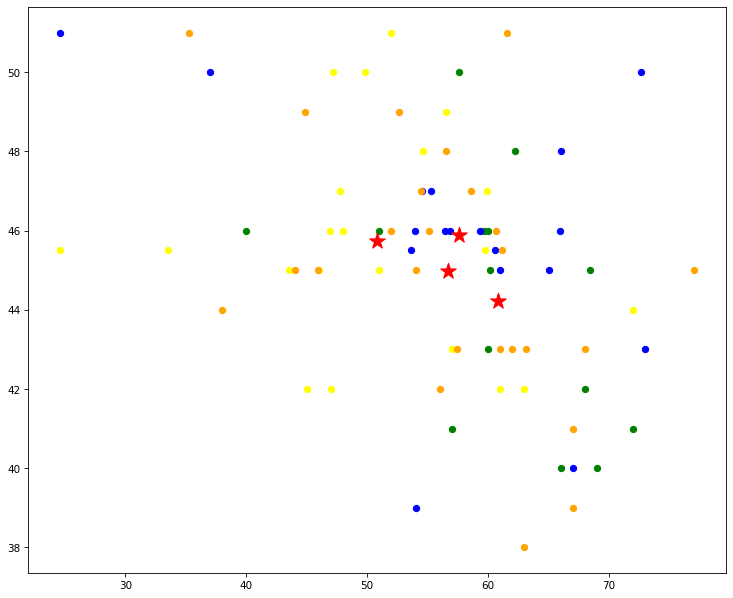

In [120]:
#ploting the graph for centroids


plt.figure(figsize=(12,10), dpi = 75)

plt.scatter(data2[y_data3 == 0, 0], data2[y_data3 == 0, 1], color = 'green' , label = 'Cluster 1')
plt.scatter(data2[y_data3 == 1, 0], data2[y_data3== 1, 1], color = 'yellow', label = 'Cluster 2')
plt.scatter(data2[y_data3 == 2, 0], data2[y_data3 == 2, 1], color = 'blue', label = 'Cluster 3')
plt.scatter(data2[y_data3 == 3, 0], data2[y_data3 == 3, 1], color = 'orange', label = 'Cluster 3')


plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1],marker = '*', c= 'red', s = 250, label = 'centroid')